# Data plot

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import face_alignment
from skimage import io
import PIL.Image as Image
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
import open3d

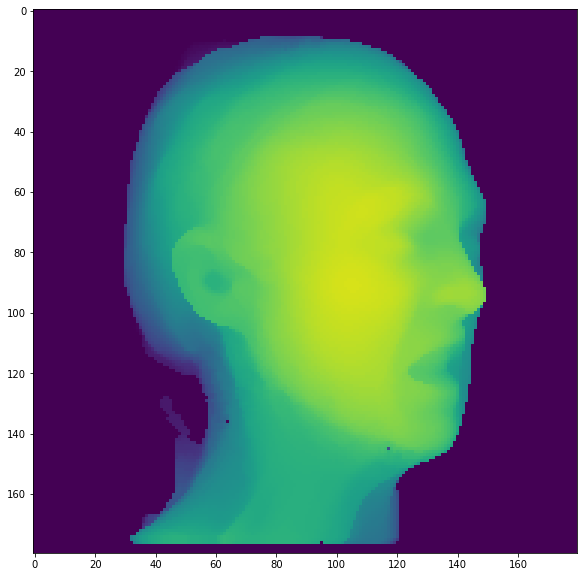

In [415]:
def median_filter(image, kernel_size):
    height, width = image.shape
    edge = kernel_size // 2
    output_image = np.copy(image)
    for i in range(edge, height - edge):
        for j in range(edge, width - edge):
            neighborhood = image[i - edge:i + edge + 1, j - edge:j + edge + 1]
            output_image[i, j] = np.median(neighborhood)
    return output_image


with open('/transfer/dataset/Depth/25/5.txt', 'r') as file:
    content = file.read()

Vertex_list = []
for line in content.split("\n"):
    Vertex_list.append(line)
Vertex_list.pop(0)
Vertex_list.pop(-1)


X_list=[]
Y_list=[]
scale_factor = 58.2
x_bia = 104
y_bia = 33
distance_list=[]
for line in Vertex_list:
    X_list.append(float(line.split(", ")[1]))
    Y_list.append(float(line.split(", ")[2]))
    distance_list.append(float(line.split(", ")[3]))

blank_img = np.zeros([180,180])
for i in range(len(blank_img)):
    for j in range(len(blank_img[i])):
        blank_img[i][j]=255
        
for i in range(len(X_list)):
    if(distance_list[i]):
        if(blank_img[-round(Y_list[i]*scale_factor)+y_bia][round(X_list[i]*scale_factor)+x_bia]==255):
            blank_img[-round(Y_list[i]*scale_factor)+y_bia][round(X_list[i]*scale_factor)+x_bia]=distance_list[i]
        else:
            if(blank_img[-round(Y_list[i]*scale_factor)+y_bia][round(X_list[i]*scale_factor)+x_bia]>distance_list[i]):
                blank_img[-round(Y_list[i]*scale_factor)+y_bia][round(X_list[i]*scale_factor)+x_bia]=distance_list[i]
                
filtered_image1 = median_filter(blank_img, 4)
plt.figure(figsize=[10,10])
plt.imshow(-filtered_image1,vmin=-2.5,vmax=-1.05)


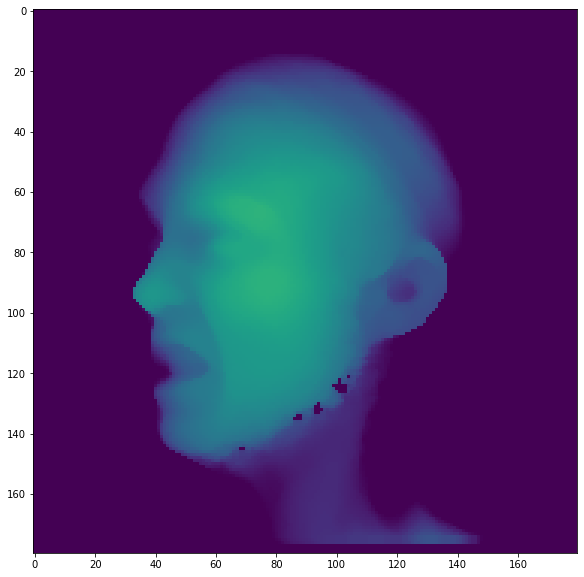

In [416]:
def median_filter(image, kernel_size):
    height, width = image.shape
    edge = kernel_size // 2
    output_image = np.copy(image)
    for i in range(edge, height - edge):
        for j in range(edge, width - edge):
            neighborhood = image[i - edge:i + edge + 1, j - edge:j + edge + 1]
            output_image[i, j] = np.median(neighborhood)
    return output_image


with open('/transfer/dataset/Depth/25/15.txt', 'r') as file:
    content = file.read()

Vertex_list = []
for line in content.split("\n"):
    Vertex_list.append(line)
Vertex_list.pop(0)
Vertex_list.pop(-1)


X_list=[]
Y_list=[]
scale_factor = 58.2
x_bia = 104
y_bia = 33
distance_list=[]
for line in Vertex_list:
    X_list.append(float(line.split(", ")[1]))
    Y_list.append(float(line.split(", ")[2]))
    distance_list.append(float(line.split(", ")[3]))

blank_img = np.zeros([180,180])
for i in range(len(blank_img)):
    for j in range(len(blank_img[i])):
        blank_img[i][j]=255
        
for i in range(len(X_list)):
    if(distance_list[i]):
        if(blank_img[-round(Y_list[i]*scale_factor)+y_bia][round(X_list[i]*scale_factor)+x_bia]==255):
            blank_img[-round(Y_list[i]*scale_factor)+y_bia][round(X_list[i]*scale_factor)+x_bia]=distance_list[i]
        else:
            if(blank_img[-round(Y_list[i]*scale_factor)+y_bia][round(X_list[i]*scale_factor)+x_bia]>distance_list[i]):
                blank_img[-round(Y_list[i]*scale_factor)+y_bia][round(X_list[i]*scale_factor)+x_bia]=distance_list[i]
                
filtered_image2 = median_filter(blank_img, 4)
plt.figure(figsize=[10,10])
plt.imshow(-filtered_image2,vmin=-1.75,vmax=-0.9)


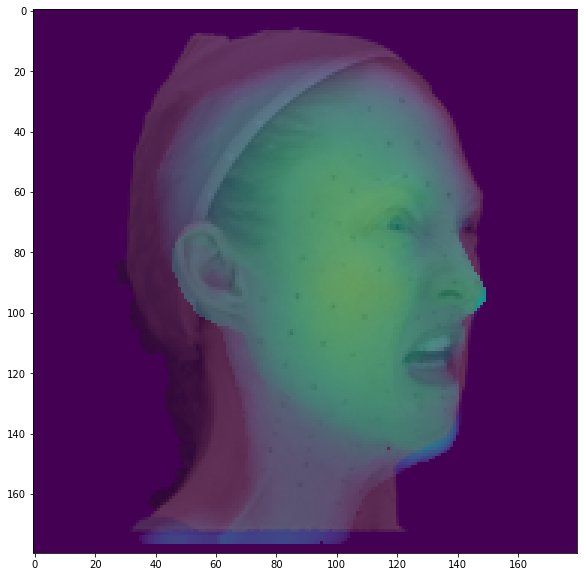

In [417]:
input_img1 = np.array(Image.open('/transfer/dataset/Original/24/output_image5.png').resize((180, 180)))
plt.figure(figsize=[10,10])
plt.imshow(-filtered_image1,vmin=-1.75,vmax=-0.90)
plt.imshow(input_img1,alpha=0.4)

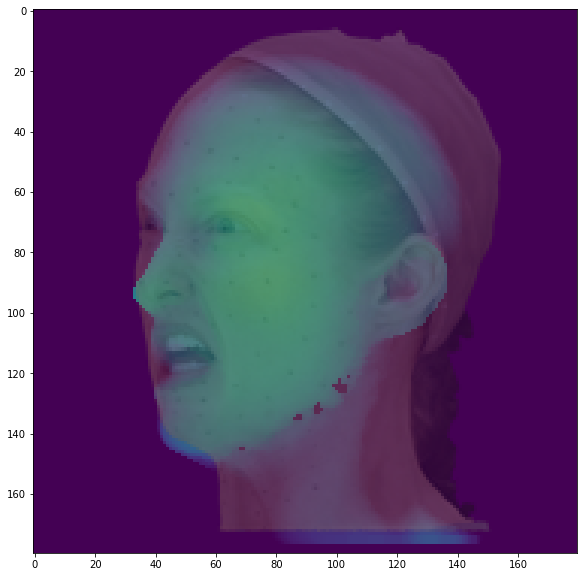

In [418]:
input_img2 = np.array(Image.open('/transfer/dataset/Original/25/output_image15.png').resize((180, 180)))
plt.figure(figsize=[10,10])
plt.imshow(-filtered_image2,vmin=-1.75,vmax=-0.90)
plt.imshow(input_img2,alpha=0.4)

# VAE Depth estimation

In [434]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import numpy as np
import random
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [435]:
#original_img = torch.tensor(np.load("ORIGNIAL_IMAGES.npy")).reshape(-1,1,180,180).long()/255
#depth_img = torch.tensor(np.load("DEPTH_IMAGES.npy")).reshape(-1,1,180,180).long()/255

original_img = torch.tensor(np.load("ORIGNIAL_IMAGES.npy")).reshape(-1,1,180,180).long()/255
depth_img = torch.tensor(np.load("DEPTH_IMAGES.npy")).reshape(-1,1,180,180).long()/255

In [436]:
random.seed(42)

numbers = list(range(741))
train_idx = random.sample(numbers, 600)
test_idx = [num for num in numbers if num not in train_idx]

train_raw_img_list=[]
train_dep_img_list=[]
for i in train_idx:
    train_raw_img_list.append(original_img[i])
    train_dep_img_list.append(depth_img[i])
train_raw_img = torch.stack(train_raw_img_list)
train_dep_img = torch.stack(train_dep_img_list)

test_raw_img_list=[]
test_dep_img_list=[]
for i in test_idx:
    test_raw_img_list.append(original_img[i])
    test_dep_img_list.append(depth_img[i])
test_raw_img = torch.stack(test_raw_img_list)
test_dep_img = torch.stack(test_dep_img_list)

In [437]:
test_raw_img.shape

torch.Size([141, 1, 180, 180])

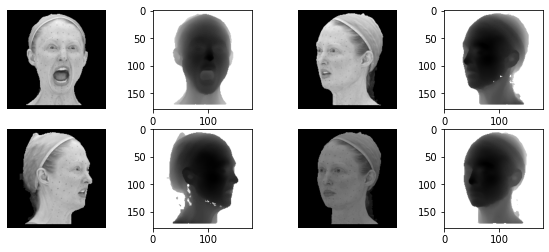

In [438]:
plt.figure(figsize=[10,4])

plt.subplot(2,4,1)
plt.axis("off")
plt.imshow(train_raw_img[0][0],cmap="gray")
plt.subplot(2,4,2)
plt.imshow(train_dep_img[0][0],cmap="gray")
#plt.title("%i" % original_img.targets[0])

plt.subplot(2,4,3)
plt.axis("off")
plt.imshow(train_raw_img[16][0],cmap="gray")
plt.subplot(2,4,4)
plt.imshow(train_dep_img[16][0],cmap="gray")
#plt.title("%i" % original_img.targets[1])

plt.subplot(2,4,5)
plt.axis("off")
plt.imshow(train_raw_img[4][0],cmap="gray")
plt.subplot(2,4,6)
plt.imshow(train_dep_img[4][0],cmap="gray")
#plt.title("%i" % original_img.targets[2])

plt.subplot(2,4,7)
plt.axis("off")
plt.imshow(train_raw_img[10][0],cmap="gray")
plt.subplot(2,4,8)
plt.imshow(train_dep_img[10][0],cmap="gray")
#plt.title("%i" % original_img.targets[3])

In [439]:
# Define the encoder network
class Encoder(nn.Module):
    def __init__(self, hidden_size, latent_size):
        super(Encoder, self).__init__()
        self.fc1 = nn.Sequential(
            nn.Conv2d(1, 2, kernel_size=3, stride=1, padding=1),  # 输入为1通道的灰度图
            nn.ReLU(),
            nn.Conv2d(2, 4, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(4, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(8*180*180, hidden_size))
            
        self.fc2 = nn.Linear(hidden_size, latent_size)
        self.fc3 = nn.Linear(hidden_size, latent_size)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        mu = self.fc2(x)
        logvar = self.fc3(x)
        return mu, logvar

# Define the decoder network
class Decoder(nn.Module):
    def __init__(self, hidden_size, latent_size):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_size, hidden_size)
        self.fc2 = nn.Sequential(
            nn.Linear(hidden_size, 8*180*180),
            nn.ReLU(),
            nn.Unflatten(1, (8, 180, 180)),
            nn.ConvTranspose2d(8, 4, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(4, 2, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(2, 1, kernel_size=3, stride=1, padding=1))
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, z):
        z = self.relu(self.fc1(z))
        x = self.sigmoid(self.fc2(z))
        return x

# Define the VAE model
class VAE(nn.Module):
    def __init__(self, hidden_size, latent_size):
        super(VAE, self).__init__()
        self.encoder = Encoder(hidden_size, latent_size)
        self.decoder = Decoder(hidden_size, latent_size)
        
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z
        
    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z)
        return x_recon, mu, logvar
    
def loss_function(x_recon, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(x_recon, x.view(-1, 1,180,180), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return KLD+BCE

In [440]:
dataset = TensorDataset(train_raw_img, train_dep_img)  
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
hidden_size = 256
latent_size = 64
vae = VAE(hidden_size, latent_size).to("cuda")
optimizer = optim.Adam(vae.parameters(), lr=0.001)
num_epochs = 100
for epoch in range(num_epochs):
    vae.train()
    train_loss = 0
    for data, target in dataloader:
        data = data.to("cuda")
        target = target.to("cuda")
        optimizer.zero_grad()
        recon_batch, mu, log_var = vae(data)
        #print(recon_batch.dtype,target.dtype)
        loss = loss_function(recon_batch, target, mu, log_var)
        loss.backward()
        train_loss += loss.item()
        
        for param in vae.parameters():
            if torch.isnan(param.grad).any() or torch.isinf(param.grad).any():
                print("NaN or Inf in gradients.", param.grad)
            
        optimizer.step()
    print(f'Epoch {epoch}, Loss: {train_loss / len(dataloader.dataset)}')

Epoch 0, Loss: 21713.414583333335
Epoch 1, Loss: 14116.742135416667
Epoch 2, Loss: 10573.366432291667
Epoch 3, Loss: 9910.9465625
Epoch 4, Loss: 9788.878463541667
Epoch 5, Loss: 9698.289088541667
Epoch 6, Loss: 9494.66578125
Epoch 7, Loss: 9175.708880208333
Epoch 8, Loss: 9030.843880208333
Epoch 9, Loss: 8628.140989583333
Epoch 10, Loss: 8261.246067708333
Epoch 11, Loss: 8164.637604166666
Epoch 12, Loss: 8107.552786458334
Epoch 13, Loss: 8045.582057291666
Epoch 14, Loss: 8017.773072916667
Epoch 15, Loss: 8014.301380208333
Epoch 16, Loss: 7992.2165625
Epoch 17, Loss: 7991.021510416666
Epoch 18, Loss: 7960.191432291666
Epoch 19, Loss: 7957.891979166667
Epoch 20, Loss: 7944.9099739583335
Epoch 21, Loss: 7933.1775520833335
Epoch 22, Loss: 7917.594895833333
Epoch 23, Loss: 7911.497734375
Epoch 24, Loss: 7900.120442708333
Epoch 25, Loss: 7892.6228645833335
Epoch 26, Loss: 7878.398463541666
Epoch 27, Loss: 7869.456875
Epoch 28, Loss: 7865.111197916666
Epoch 29, Loss: 7858.555625
Epoch 30, Los

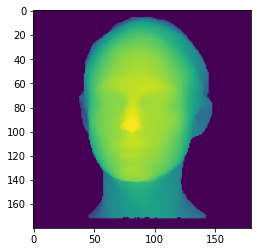

In [441]:
#a = vae(original_img[9][0].reshape(1,-1).to("cuda"))[0]
#plt.imshow(a.reshape(180,180).to("cpu"))
a = np.array(test_dep_img[19][0].to("cpu").detach())
plt.imshow(-a)

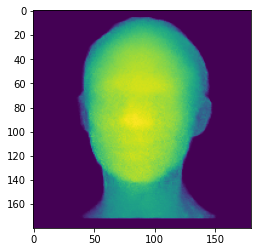

In [442]:
a = vae(test_raw_img[19][0].reshape(1,1,180,180).to("cuda"))[0]
#plt.imshow(a.reshape(180,180).to("cpu"))
a = np.array(a.reshape(180,180).to("cpu").detach())
plt.imshow(-a)

# Point clouds reconstruction

In [419]:
Point_list1 = []
Texture_list1 = []
for i in range(len(-filtered_image1)):
    for j in range(len(-filtered_image1[i])):
        if(-filtered_image1[i][j]!=-255)and(-filtered_image1[i][j]>-2):
            Point_list1.append([i, j, -filtered_image1[i][j]])
            Texture_list1.append(input_img1[i][j][:3]/255)
            
Point_list2 = []
Texture_list2 = []
for i in range(len(-filtered_image2)):
    for j in range(len(-filtered_image2[i])):
        if(-filtered_image2[i][j]!=-255)and(-filtered_image2[i][j]>-2):
            Point_list2.append([i, j, -filtered_image2[i][j]])
            Texture_list2.append(input_img2[i][j][:3]/255)

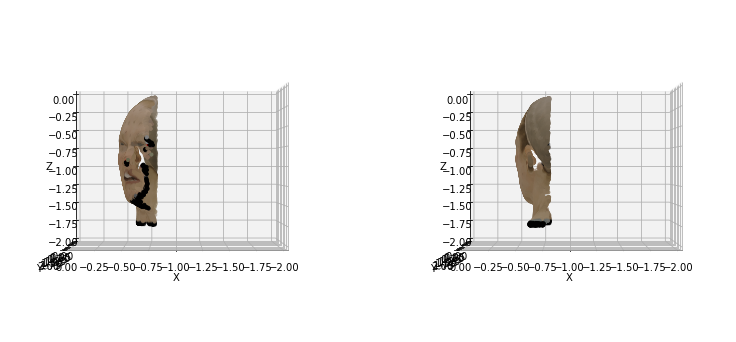

In [420]:
#depth = (-filtered_image).astype(float) / 1000.0  # Convert depth to meters

fig = plt.figure(figsize=[20,20])
ax = fig.add_subplot(131,projection='3d')
Point_array1 = np.array(Point_list1)/100



ax.set_xlim(-2,0)
ax.set_ylim(0,2)
ax.set_zlim(-2,0)
ax.scatter(Point_array1[:,2]*40, Point_array1[:,1], -Point_array1[:,0], c=Texture_list1 ,s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=0,azim=90)

ax = fig.add_subplot(132,projection='3d')
Point_array2 = np.array(Point_list2)/100



ax.set_xlim(-2,0)
ax.set_ylim(0,2)
ax.set_zlim(-2,0)
ax.scatter(Point_array2[:,2]*40, Point_array2[:,1], -Point_array2[:,0], c=Texture_list2 ,s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=0,azim=90)



plt.show()


# Facial kepoints extraction

In [421]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.THREE_D, flip_input=False)
Input1 = input_img1
Input2 = input_img2
arr_rgb1 = Input1[:, :, :3]
arr_rgb2 = Input2[:, :, :3]
preds1 = fa.get_landmarks(arr_rgb1)[0]
preds2 = fa.get_landmarks(arr_rgb2)[0]

preds1[:, [0, 1]] = preds1[:, [1, 0]]
preds2[:, [0, 1]] = preds2[:, [1, 0]]

#preds1[:, 2] *= 80
#preds2[:, 2] *= 80

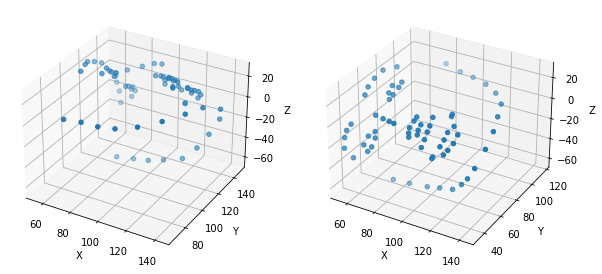

In [422]:
fig = plt.figure(figsize=[10,10])

ax = fig.add_subplot(121,projection='3d')
ax.scatter(preds1[:,0], preds1[:,1], preds1[:,2] ,s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax = fig.add_subplot(122,projection='3d')
ax.scatter(preds2[:,0], preds2[:,1], preds2[:,2] ,s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [423]:
source = preds2/100
target = preds1/100


centroid_source = np.mean(source, axis=0)
centroid_target = np.mean(target, axis=0)


source_centered = source - centroid_source
target_centered = target - centroid_target

H = np.dot(source_centered.T, target_centered)

U, S, Vt = np.linalg.svd(H)
R = np.dot(Vt.T, U.T)

if np.linalg.det(R) < 0:
    Vt[-1, :] *= -1
    R = np.dot(Vt.T, U.T)

t = centroid_target - np.dot(R, centroid_source)
source_transformed = np.dot(source, R.T) + t

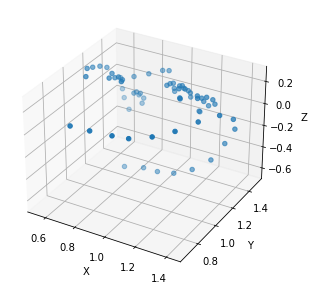

In [424]:
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111,projection='3d')

ax.scatter(source_transformed[:,0], source_transformed[:,1], source_transformed[:,2] ,s=20)
A=54
#ax.scatter(preds1[:A,0], preds1[:A,1], preds1[:A,2] ,s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#ax.view_init(elev=90,azim=0)

plt.show()

# Reconstruction based on facial keypoints

In [425]:
key_point_list1=[]
key_point_list2=[]
for i in range(len(preds1)):
    key_point_list1.append(-filtered_image1[int(preds1[i][0])][int(preds1[i][1])])
    
for i in range(len(preds2)):
    key_point_list2.append(-filtered_image2[int(preds2[i][0])][int(preds2[i][1])])
    
key_point_array1 = np.array(key_point_list1)
key_point_array2 = np.array(key_point_list2)

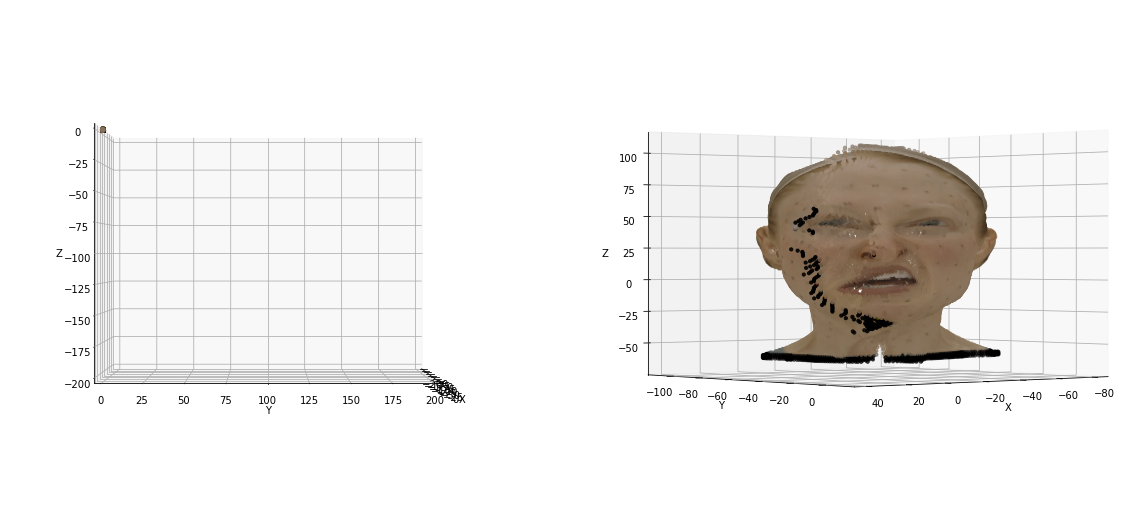

In [426]:
#depth = (-filtered_image).astype(float) / 1000.0  # Convert depth to meters

scale_factor = 65
stop = 31

fig = plt.figure(figsize=[20,20])
ax = fig.add_subplot(121,projection='3d')
Point_array1 = np.array(Point_list1)
Point_array1[:, 2] *= scale_factor


ax.set_xlim(-200,0)
ax.set_ylim(0,200)
ax.set_zlim(-200,0)
#ax.scatter(Point_array1[:,2], 
           #Point_array1[:,1], 
           #-Point_array1[:,0], c=Texture_list1 ,s=10)
ax.scatter(Point_array2[:,2], 
           Point_array2[:,1], 
           -Point_array2[:,0], c=Texture_list2 ,s=10)

#ax.scatter(, source_transformed[:,1], -source_transformed[:,0],s=500)


#ax.scatter(Point_array2_transformed[:,2]-60, Point_array2_transformed[:,1]+80, -Point_array2_transformed[:,0], c=Texture_list2 ,s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=0,azim=0)

ax = fig.add_subplot(122,projection='3d')
Point_array2 = np.array(Point_list2)
Point_array2[:, 2] *= scale_factor
Point_array2_transformed = np.dot(Point_array2, R.T) + t

preds2[:,2]=key_point_array2*scale_factor
preds2_transformed = np.dot(preds2, R.T) + t

Point_array1[:,2]-=key_point_array1[A]*scale_factor, 
Point_array1[:,1]-=preds1[A,1], 
Point_array1[:,0]-=preds1[A,0]
Point_array2_transformed[:,2]-=preds2_transformed[A,2], 
Point_array2_transformed[:,1]-=preds2_transformed[A,1], 
Point_array2_transformed[:,0]-=preds2_transformed[A,0]



A=30
ax.scatter(Point_array1[:,2], 
           Point_array1[:,1], 
           -Point_array1[:,0], c=Texture_list1 ,s=10)


ax.scatter(Point_array2_transformed[:,2], 
           Point_array2_transformed[:,1], 
           -Point_array2_transformed[:,0], c=Texture_list2 ,s=10)



ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=0,azim=50)


plt.show()


 # ICP amendment

In [427]:
def pairwise_registration(source, target):
    print("Apply point-to-plane ICP")
    icp_coarse = o3d.pipelines.registration.registration_icp(
        source, target, max_correspondence_distance_coarse, np.identity(4),
        o3d.pipelines.registration.TransformationEstimationPointToPlane())
    icp_fine = o3d.pipelines.registration.registration_icp(
        source, target, max_correspondence_distance_fine,
        icp_coarse.transformation,
        o3d.pipelines.registration.TransformationEstimationPointToPlane())
    transformation_icp = icp_fine.transformation
    information_icp = o3d.pipelines.registration.get_information_matrix_from_point_clouds(
        source, target, max_correspondence_distance_fine,
        icp_fine.transformation)
    return transformation_icp, information_icp


def full_registration(pcds, max_correspondence_distance_coarse,
                      max_correspondence_distance_fine):
    pose_graph = o3d.pipelines.registration.PoseGraph()
    odometry = np.identity(4)
    pose_graph.nodes.append(o3d.pipelines.registration.PoseGraphNode(odometry))
    n_pcds = len(pcds)
    for source_id in range(n_pcds):
        for target_id in range(source_id + 1, n_pcds):
            transformation_icp, information_icp = pairwise_registration(
                pcds[source_id], pcds[target_id])
            print("Build o3d.pipelines.registration.PoseGraph")
            if target_id == source_id + 1:  # odometry case
                odometry = np.dot(transformation_icp, odometry)
                pose_graph.nodes.append(
                    o3d.pipelines.registration.PoseGraphNode(
                        np.linalg.inv(odometry)))
                pose_graph.edges.append(
                    o3d.pipelines.registration.PoseGraphEdge(source_id,
                                                             target_id,
                                                             transformation_icp,
                                                             information_icp,
                                                             uncertain=False))
            else:  # loop closure case
                pose_graph.edges.append(
                    o3d.pipelines.registration.PoseGraphEdge(source_id,
                                                             target_id,
                                                             transformation_icp,
                                                             information_icp,
                                                             uncertain=True))
    return pose_graph

In [428]:
import open3d as o3d
import numpy as np
from scipy.spatial import cKDTree


pcd1 = o3d.geometry.PointCloud()
pcd2 = o3d.geometry.PointCloud()


pcd1.points = o3d.utility.Vector3dVector(Point_array1)
pcd2.points = o3d.utility.Vector3dVector(Point_array2_transformed)


colors_array_1 = np.array(Texture_list1)  
colors_array_2 = np.array(Texture_list2)
pcd1.colors = o3d.utility.Vector3dVector(colors_array_1)
pcd2.colors = o3d.utility.Vector3dVector(colors_array_2)


o3d.visualization.draw_geometries([pcd1, pcd2])

In [433]:
#bad
voxel_size=1
pcd1_down = pcd1.voxel_down_sample(voxel_size=voxel_size)
pcd2_down = pcd2.voxel_down_sample(voxel_size=voxel_size)

radius_normal = voxel_size * 2
pcd1_down.estimate_normals(o3d.geometry.KDTreeSearchParamHybrid(radius=radius_normal, max_nn=70))
pcd2_down.estimate_normals(o3d.geometry.KDTreeSearchParamHybrid(radius=radius_normal, max_nn=70))

pcds_down = [pcd1_down, pcd2_down]
o3d.visualization.draw_geometries([pcd1_down, pcd2_down])

In [432]:
#good
print("Full registration ...")
max_correspondence_distance_coarse = voxel_size * 15
max_correspondence_distance_fine = voxel_size * 1.5
with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    pose_graph = full_registration(pcds_down,
                                   max_correspondence_distance_coarse,
                                   max_correspondence_distance_fine)

print("Optimizing PoseGraph ...")
option = o3d.pipelines.registration.GlobalOptimizationOption(
    max_correspondence_distance=max_correspondence_distance_fine,
    edge_prune_threshold=0.35,
    reference_node=0)
with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
        pose_graph,
        o3d.pipelines.registration.GlobalOptimizationLevenbergMarquardt(),
        o3d.pipelines.registration.GlobalOptimizationConvergenceCriteria(),
        option
    
print("Transform points and display")
for point_id in range(len(pcds_down)):
    print(pose_graph.nodes[point_id].pose)
    pcds_down[point_id].transform(pose_graph.nodes[point_id].pose)
o3d.visualization.draw_geometries(pcds_down)

Full registration ...
Apply point-to-plane ICP
[Open3D DEBUG] ICP Iteration #0: Fitness 0.4653, RMSE 7.0347
[Open3D DEBUG] Residual : 2.55e+01 (# of elements : 7108)
[Open3D DEBUG] ICP Iteration #1: Fitness 0.5089, RMSE 5.6239
[Open3D DEBUG] Residual : 7.05e+00 (# of elements : 7774)
[Open3D DEBUG] ICP Iteration #2: Fitness 0.5081, RMSE 5.5701
[Open3D DEBUG] Residual : 5.25e+00 (# of elements : 7762)
[Open3D DEBUG] ICP Iteration #3: Fitness 0.5062, RMSE 5.5815
[Open3D DEBUG] Residual : 5.01e+00 (# of elements : 7732)
[Open3D DEBUG] ICP Iteration #4: Fitness 0.5054, RMSE 5.5950
[Open3D DEBUG] Residual : 5.00e+00 (# of elements : 7721)
[Open3D DEBUG] ICP Iteration #5: Fitness 0.5049, RMSE 5.5954
[Open3D DEBUG] Residual : 5.04e+00 (# of elements : 7713)
[Open3D DEBUG] ICP Iteration #6: Fitness 0.5046, RMSE 5.5917
[Open3D DEBUG] Residual : 5.07e+00 (# of elements : 7708)
[Open3D DEBUG] ICP Iteration #7: Fitness 0.5046, RMSE 5.5922
[Open3D DEBUG] Residual : 5.07e+00 (# of elements : 7708)
[